In [27]:
# STEP 1 - Cleaning and Pre-processing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [2]:
credit = pd.read_csv(r"C:\Users\i_seg\OneDrive\BIG DATA\DATA ANALISYS\MODULE5\Task2\default of credit card clients.csv", header =1)

In [3]:
#Check missing values
credit.isnull()
#there is not missing data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
#delete unnecesary columns
credit=credit.drop(columns=['ID'])

In [5]:
#rename columns
credit.rename(columns={"default payment next month": "PayCredit"}, inplace = True)

In [6]:
#review  the data
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PayCredit
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [26]:
#STEP 2- Covariance Estimation
covMat = credit.cov()
print(covMat)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

In [ ]:
#CORRELATION
corrMat = credit.corr()
print(corrMat)

In [ ]:
# As we can see in the matrix above, the following attributes have CORRELATION >90
#'BILL_AMT4', 'BILL_AMT5','BILL_AMT6'

In [14]:
#STEP 4 - Feature Engineering RFE
#Removing Correlated Features, applying RFE
correlated_features = set()
correlation_matrix = credit.drop('PayCredit', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [15]:
#correlated features
correlated_features
#{'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_5','PAY_6'}

{'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_5',
 'PAY_6'}

In [18]:
#Running RFECV to get the more important features
X = credit.drop('PayCredit', axis=1)
target = credit['PayCredit']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [19]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 23


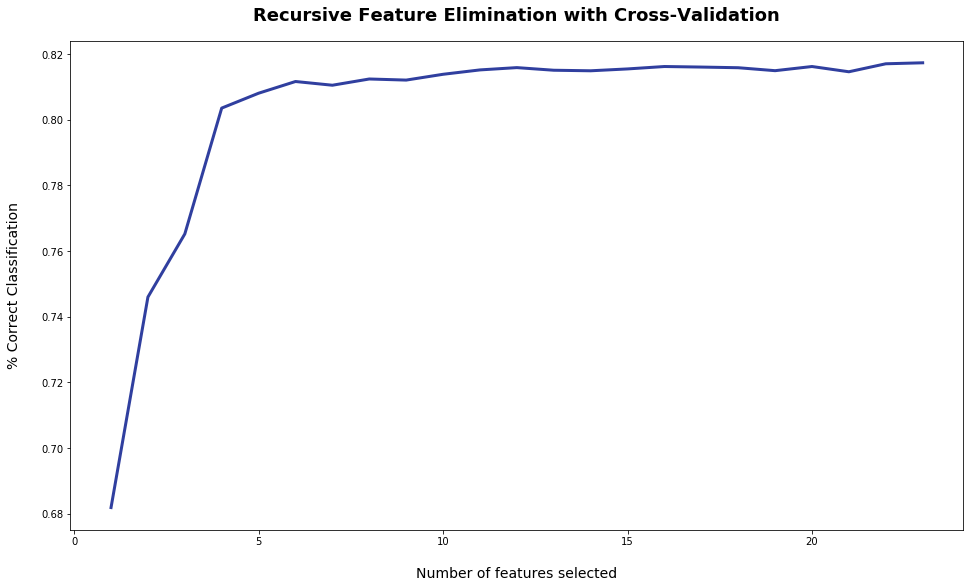

In [20]:
#accuracy obtained with every number of features used:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

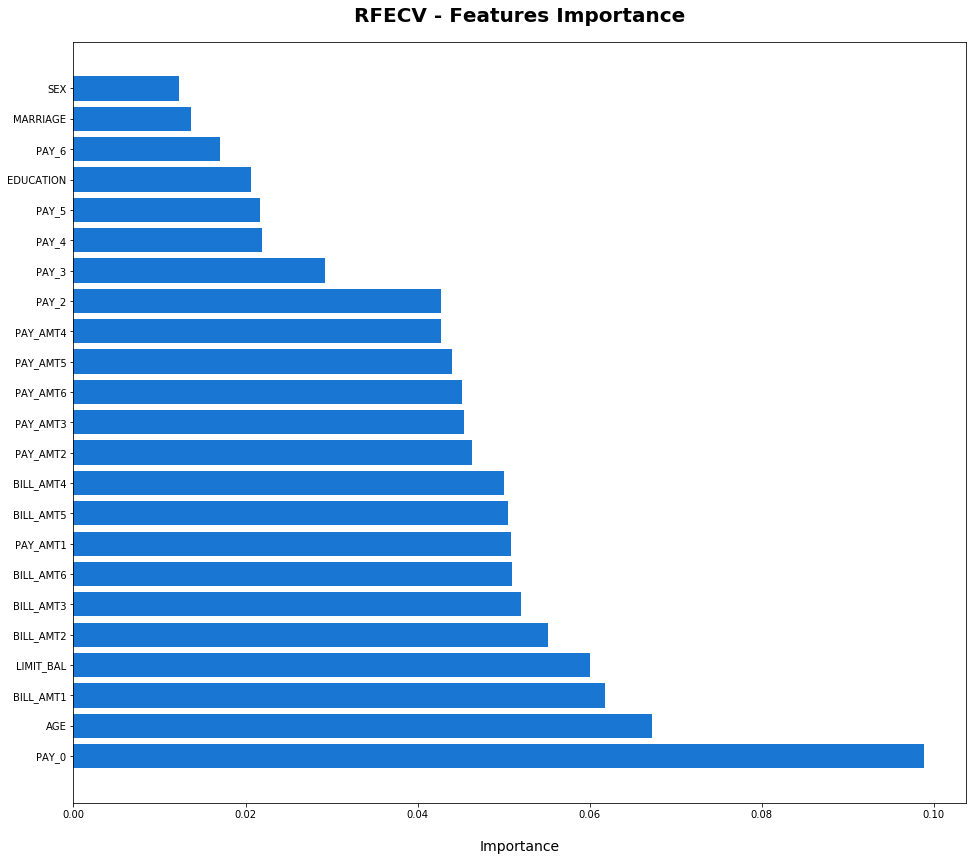

In [23]:
# create a DataFrame object with attributes as one column and the importance as the other, 
#and then sort the DataFrame by importance in descending order. 
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Features Importance', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
#Based on the RFE applied above, with  6 features the accuracy was about 60%. 
#I will use those six columns to train the model (PAY_0, AGE, BILL_AMT1, LIMIT_BAL, BILL_AMT2, BILL_AMT3 )

In [7]:
#delete columns that are not in the top 6 of RFE
credit= credit.drop(columns=['BILL_AMT6', 'PAY_AMT1','BILL_AMT5', 'BILL_AMT4','PAY_AMT2', 'PAY_AMT3','PAY_AMT6','PAY_AMT5',
                            'PAY_AMT4','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'EDUCATION', 'PAY_6','MARRIAGE','SEX'])

In [8]:
#create categories for the AGE attribute, we will hace 7 categories.
data = [credit]
for dataset in data:
    dataset['AGE'] = dataset['AGE'].astype(int)
    dataset.loc[ dataset['AGE'] <= 20, 'AGE'] = 0
    dataset.loc[(dataset['AGE'] > 20) & (dataset['AGE'] <= 23), 'AGE'] = 1
    dataset.loc[(dataset['AGE'] > 23) & (dataset['AGE'] <= 27), 'AGE'] = 2
    dataset.loc[(dataset['AGE'] > 27) & (dataset['AGE'] <= 33), 'AGE'] = 3
    dataset.loc[(dataset['AGE'] > 33) & (dataset['AGE'] <= 40), 'AGE'] = 4
    dataset.loc[(dataset['AGE'] > 40) & (dataset['AGE'] <= 66), 'AGE'] = 5
    dataset.loc[ dataset['AGE'] > 66, 'AGE'] = 6

# let's see how it's distributed credit['AGE'].value_counts()
credit['AGE'].value_counts()

5    8213
3    7930
4    7192
2    5046
1    1558
6      61
Name: AGE, dtype: int64

In [9]:
#export the final dataset
export_csv = credit.to_csv (r'C:\Users\i_seg\OneDrive\BIG DATA\DATA ANALISYS\MODULE5\Task3\PreparedDataset.csv', index = None, header=True)